In [1]:
import psutil
import datetime
from csv import writer
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cpu_times = psutil.cpu_times_percent(interval=1, percpu=True)

In [3]:
cpu_percent = psutil.cpu_percent(interval=1, percpu=True)

In [4]:
cpu_count = psutil.cpu_count(logical=True)

In [5]:
current_datetime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [6]:
file_name = 'cpu_times.csv'
if os.path.exists(file_name):
    mode = 'a'
else:
    mode = 'a+'
    header = ['datetime', 'cpu', 'user', 'nice', 'system', 'idle', 'iowait', 'irq', 'softirq', 'steal', 'guest', 'guest_nice']

with open(file_name, mode) as file:
    writer_object = writer(file)

    if mode == 'a+':
        writer_object.writerow(header)

    for cpu in range(cpu_count):
        writer_object.writerow([current_datetime,
                                cpu,
                                cpu_times[cpu].user,
                                cpu_times[cpu].nice,
                                cpu_times[cpu].system,
                                cpu_times[cpu].idle,
                                cpu_times[cpu].iowait,
                                cpu_times[cpu].irq,
                                cpu_times[cpu].softirq,
                                cpu_times[cpu].steal,
                                cpu_times[cpu].guest,
                                cpu_times[cpu].guest_nice])
    file.close()

In [7]:
df = pd.read_csv(file_name)

In [8]:
times = pd.to_datetime(df.datetime)

In [9]:
df = df.groupby([times.dt.date, times.dt.hour, 'cpu']).mean(numeric_only=True)
df.index.names = ['date', 'hour', 'cpu']
df = df.reset_index()

In [10]:
df = df.groupby(['date', 'hour']).sum(numeric_only=True)
df = df.reset_index()

In [11]:
df = df.sort_values(by=['date', 'hour'])

In [12]:
considered_df = df.tail(24)
considered_df = considered_df.drop('date', axis=1)
considered_df = considered_df.drop('cpu', axis=1)

([<matplotlib.axis.XTick at 0x7f84bc25f9a0>,
 [Text(0, 0, '22'),
  Text(1, 0, '23'),
  Text(2, 0, '0'),
  Text(3, 0, '1'),
  Text(4, 0, '2')])

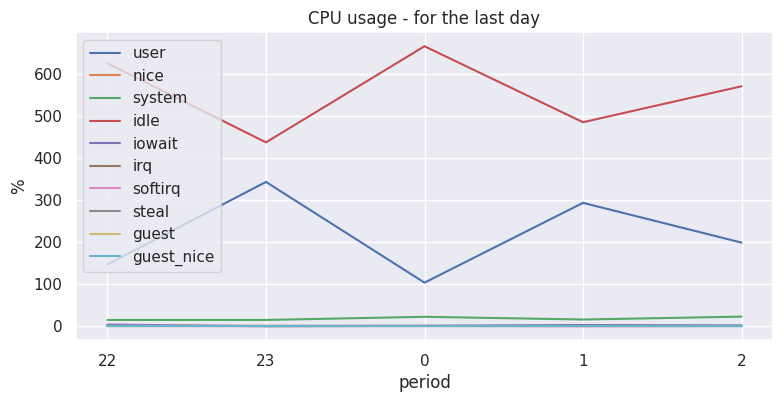

In [14]:
sns.set_theme()
color_map = ['cornflowerblue', 'orange', 'lime', 'wheat', 'darkblue']

for column in considered_df.columns:
    if column == 'hour':
        continue
    plt.plot(np.arange(len(considered_df)), considered_df[column], label=column)

plt.title('CPU usage - for the last day')
plt.rcParams["figure.figsize"] = (9,4)
plt.legend(loc='upper left')
plt.xlabel('period')
plt.ylabel('%')
plt.xticks(range(len(considered_df)), considered_df['hour'])

In [15]:
considered_df

,hour,user,nice,system,idle,iowait,irq,softirq,steal,guest,guest_nice
0,22,147.00,0.0,15.00,625.00,4.0,0.0,1.0,0.0,0.0,0.0
1,23,343.00,0.0,15.00,437.00,0.0,0.0,1.0,0.0,0.0,0.0
2,0,103.65,0.0,22.45,665.45,1.0,0.0,1.0,0.0,0.0,0.0
3,1,293.30,0.0,16.00,484.90,3.0,0.0,0.0,0.0,0.0,0.0
4,2,198.80,0.0,22.88,570.34,2.0,0.0,0.6,0.0,0.0,0.0
